In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import yfinance as yf
import datetime

from valueinvesting import utils as utils

# 1. Load raw input
## Hardcoded block

In [2]:
evaluate_last_X_years = False
X=10
currency_pair = 'USD=X'
numbers_in_currency = 'USD'
share_name = 'ES'

# 1.1 Calculate Share numbers from total distributed dividend (CFS) and dividend amount

# 1.2. Raw input statement data

In [3]:
route = f"../data/input/{share_name}_data.csv"
data = pd.read_csv(route, sep=';', parse_dates=['date', 'real_date'])
# replace -, extend missing 0-s, fix datatype
data = utils.replace_format_input(data)

In [4]:
owned_shares = pd.read_csv('../data/extras/owned_stocks.csv', sep=';', parse_dates=['date'])
owned_shares = owned_shares.loc[(owned_shares['stock'] == share_name) & (owned_shares['active'] == 'yes')]

## (OPTIONAL) Time Filtering - Last 7 years daat

In [5]:
if evaluate_last_X_years:
    data = data[data['date'] > datetime.datetime.today() - datetime.timedelta(days=X*366+93)]
    data = data.reset_index(drop=True)

data.head()

,date,revenue,cogs,gross_profit,net_profit,cash,acc_rec,inventory,curr_assets,goodwill,...,acc_pay,short_term_debt,current_debt,curr_liab,long_term_debt,total_liab,cash_from_operating_activities,capex,shares,real_date
0,1999-03-31,1043,0,1043,24,336,226,200,1068,0,...,319,225,406,1210,3218,8014,302,-86,132.03,1999-05-05
1,1999-06-30,1039,0,1039,6,220,343,198,1067,0,...,480,258,323,1270,3151,7998,168,-79,132.03,1999-08-04
2,1999-09-30,1241,0,1241,37,335,332,205,1176,0,...,335,251,530,1443,2947,7897,140,-61,132.03,1999-11-04
3,1999-12-31,1149,0,1149,-10,255,310,173,1070,24,...,347,278,622,1570,2372,7347,4,-95,132.03,2000-02-14
4,2000-03-31,1382,0,1382,79,370,448,174,1378,345,...,437,984,461,2196,2444,8121,114,-68,142.97,2000-05-05


## Calculate date when quaterly reports could be available

In [6]:
data = utils.calculate_real_date(data)

# 2. Filter out unnecesary columns

In [7]:
data = utils.filter_raw_data(data)
data.tail()

,date,real_date,shares,revenue,cogs,gross_profit,net_profit,cash,acc_rec,inventory,...,intangible_assets,total_assets,acc_pay,short_term_debt,current_debt,curr_liab,long_term_debt,total_liab,cash_from_operating_activities,capex
96,2023-03-31,2023-05-05,349.84,3796,0,3796,493,36,1660,423,...,0,54105,1822,1196,1659,6406,20951,38200,69,-977
97,2023-06-30,2023-08-04,349.84,2629,0,2629,17,42,1332,406,...,0,54540,1550,556,2106,5795,22161,38830,578,-1062
98,2023-09-30,2023-11-04,349.84,2792,0,2792,342,79,1430,446,...,0,56293,1642,1530,2115,7120,22455,40452,522,-1086
99,2023-12-31,2024-02-14,349.84,2690,0,2690,-1287,54,1432,507,...,0,55612,1869,1930,873,6341,23956,41283,477,-1211
100,2024-03-31,2024-05-05,351.00,3333,0,3333,524,259,1593,555,...,0,57322,1664,2103,909,6368,25275,42623,291,-1149


## Pull historical average USD national currency rates and add to the dataframe

In [8]:
if currency_pair != 'USD=X':
    data['usd_nat_currency'] = utils.daily_price(
        ticker=currency_pair,
        end=data['date'],
        days_earlier=90
        )
else:
    data['usd_nat_currency'] = [1 for x in range(len(data))]

# drop rows, when USD rates wasn't available
data = data[data['usd_nat_currency'].notna()]

data.tail()

,date,real_date,shares,revenue,cogs,gross_profit,net_profit,cash,acc_rec,inventory,...,total_assets,acc_pay,short_term_debt,current_debt,curr_liab,long_term_debt,total_liab,cash_from_operating_activities,capex,usd_nat_currency
96,2023-03-31,2023-05-05,349.84,3796,0,3796,493,36,1660,423,...,54105,1822,1196,1659,6406,20951,38200,69,-977,1
97,2023-06-30,2023-08-04,349.84,2629,0,2629,17,42,1332,406,...,54540,1550,556,2106,5795,22161,38830,578,-1062,1
98,2023-09-30,2023-11-04,349.84,2792,0,2792,342,79,1430,446,...,56293,1642,1530,2115,7120,22455,40452,522,-1086,1
99,2023-12-31,2024-02-14,349.84,2690,0,2690,-1287,54,1432,507,...,55612,1869,1930,873,6341,23956,41283,477,-1211,1
100,2024-03-31,2024-05-05,351.00,3333,0,3333,524,259,1593,555,...,57322,1664,2103,909,6368,25275,42623,291,-1149,1


## Convert USD values related to IS, BS, CFS to national currency

In [9]:
# convert columns into national currency if necessary
if numbers_in_currency == 'USD':
    data_nat_curr = utils.convert_national_currency(input_data=data, currency=data)
else:
    data_nat_curr = data.copy()
data_nat_curr.tail()

,date,real_date,shares,revenue,cogs,gross_profit,net_profit,cash,acc_rec,inventory,...,total_assets,acc_pay,short_term_debt,current_debt,curr_liab,long_term_debt,total_liab,cash_from_operating_activities,capex,usd_nat_currency
96,2023-03-31,2023-05-05,349.84,3796.0,0.0,3796.0,493.0,36.0,1660.0,423.0,...,54105.0,1822.0,1196.0,1659.0,6406.0,20951.0,38200.0,69.0,-977.0,1
97,2023-06-30,2023-08-04,349.84,2629.0,0.0,2629.0,17.0,42.0,1332.0,406.0,...,54540.0,1550.0,556.0,2106.0,5795.0,22161.0,38830.0,578.0,-1062.0,1
98,2023-09-30,2023-11-04,349.84,2792.0,0.0,2792.0,342.0,79.0,1430.0,446.0,...,56293.0,1642.0,1530.0,2115.0,7120.0,22455.0,40452.0,522.0,-1086.0,1
99,2023-12-31,2024-02-14,349.84,2690.0,0.0,2690.0,-1287.0,54.0,1432.0,507.0,...,55612.0,1869.0,1930.0,873.0,6341.0,23956.0,41283.0,477.0,-1211.0,1
100,2024-03-31,2024-05-05,351.00,3333.0,0.0,3333.0,524.0,259.0,1593.0,555.0,...,57322.0,1664.0,2103.0,909.0,6368.0,25275.0,42623.0,291.0,-1149.0,1


# 3. Calculate input to Value Raios (eps, bv per share, fcf)
## filter out unwanted columns

In [10]:
filtered_nat_curr = utils.calculate_input_value_ratios(data_nat_curr)

## Calculate input values to value ratios

In [11]:
ratios_nat_curr = utils.ratios_input_filter(filtered_nat_curr)

## Calculate performance parameters (current ratio, ROA, ROE, margins, D/E)

In [12]:
ratios_nat_curr = utils.evaluate_performance(input=filtered_nat_curr, output=ratios_nat_curr)

# 4. Pull historical share prices and merge with sattement data

In [13]:
# pull weekly share prices and merge with the value ratios
merged_nat_curr = utils.add_share_prices_to_value_ratios(share_name, data, ratios_nat_curr)
merged_nat_curr.head()

,real_date,share_price,date,revenue,eps,bv_per_share,shares,fcf,fcf_per_share,cash,...,equity_ratio,debt_ratio,acc_rec_ratio,acc_pay_ratio,cash_turnover,inventory_turnover,gross_profit_margin,net_profit_margin,roa,roe
0,1999-05-10,7.514822,1999-03-31,1043.0,0.0,17.95804,132.03,0.0,0.0,336.0,...,0.22831,0.77169,0.0,0.0,0.0,0.0,1.0,0.023011,0.0,0.0
1,1999-05-17,7.656078,1999-03-31,1043.0,0.0,17.95804,132.03,0.0,0.0,336.0,...,0.22831,0.77169,0.0,0.0,0.0,0.0,1.0,0.023011,0.0,0.0
2,1999-05-24,7.966843,1999-03-31,1043.0,0.0,17.95804,132.03,0.0,0.0,336.0,...,0.22831,0.77169,0.0,0.0,0.0,0.0,1.0,0.023011,0.0,0.0
3,1999-05-31,7.910338,1999-03-31,1043.0,0.0,17.95804,132.03,0.0,0.0,336.0,...,0.22831,0.77169,0.0,0.0,0.0,0.0,1.0,0.023011,0.0,0.0
4,1999-06-07,7.627822,1999-03-31,1043.0,0.0,17.95804,132.03,0.0,0.0,336.0,...,0.22831,0.77169,0.0,0.0,0.0,0.0,1.0,0.023011,0.0,0.0


# Calculate price ratios (P/E, P/B, P/S, P/FCF)

In [14]:
merged_nat_curr = utils.price_ratios(merged_nat_curr)
merged_nat_curr.head()

,real_date,share_price,date,revenue,eps,bv_per_share,shares,fcf,fcf_per_share,cash,...,inventory_turnover,gross_profit_margin,net_profit_margin,roa,roe,pe_ratio,pb_ratio,ps_ratio,ev_revenue,pfcf_ratio
0,1999-05-10,7.514822,1999-03-31,1043.0,0.0,17.95804,132.03,0.0,0.0,336.0,...,0.0,1.0,0.023011,0.0,0.0,inf,0.418466,0.237819,2.078184,inf
1,1999-05-17,7.656078,1999-03-31,1043.0,0.0,17.95804,132.03,0.0,0.0,336.0,...,0.0,1.0,0.023011,0.0,0.0,inf,0.426332,0.242290,2.082654,inf
2,1999-05-24,7.966843,1999-03-31,1043.0,0.0,17.95804,132.03,0.0,0.0,336.0,...,0.0,1.0,0.023011,0.0,0.0,inf,0.443637,0.252124,2.092489,inf
3,1999-05-31,7.910338,1999-03-31,1043.0,0.0,17.95804,132.03,0.0,0.0,336.0,...,0.0,1.0,0.023011,0.0,0.0,inf,0.440490,0.250336,2.090700,inf
4,1999-06-07,7.627822,1999-03-31,1043.0,0.0,17.95804,132.03,0.0,0.0,336.0,...,0.0,1.0,0.023011,0.0,0.0,inf,0.424758,0.241395,2.081760,inf


# Calculate Dividend yield and currency-share price correlation

In [15]:
# get daily historical USD-national currency rates
usd_nat_curr = utils.get_historical_currency_rate(currency_pair, merged_nat_curr)

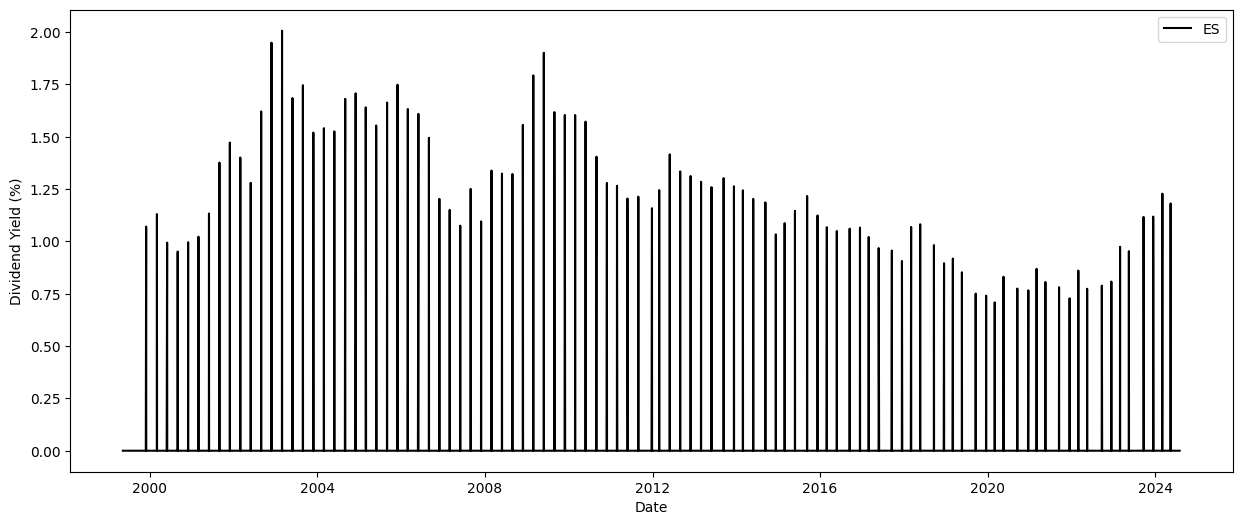

In [16]:
# get share prices and dividend yield data
ticker_all_price = utils.get_historical_share_dividend(share_name, merged_nat_curr)

currency_rate   NaN
share_price     NaN
Name: share_price, dtype: float64


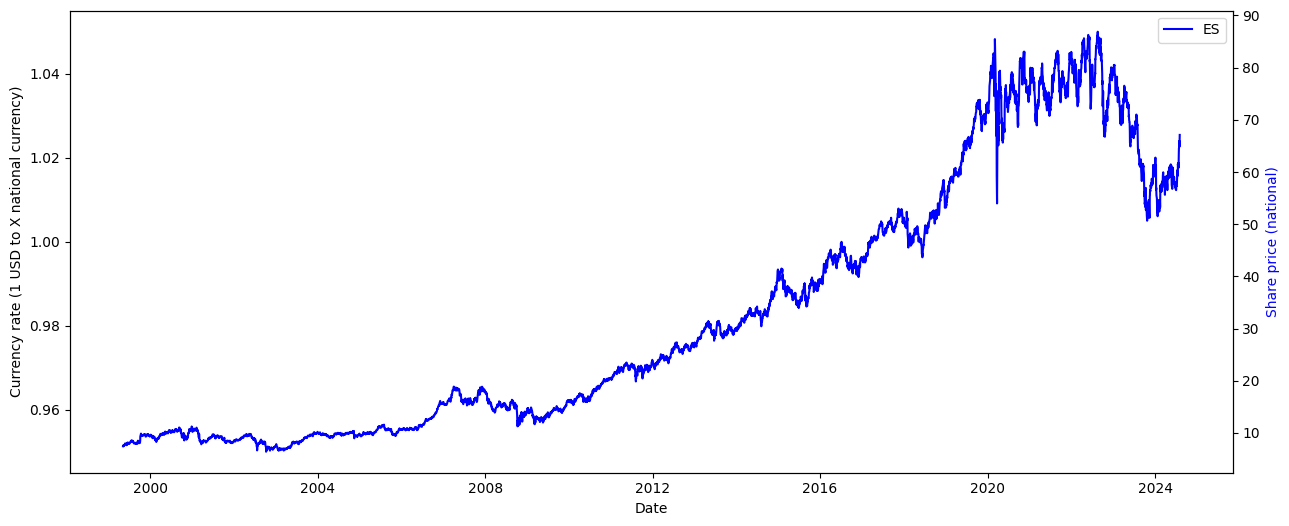

In [17]:
# Pearson's correlation coefficient between share price and USD - national currency rate
utils.get_currency_share_price_correlation(share_name, usd_nat_curr, ticker_all_price)

# Share price and value ratios

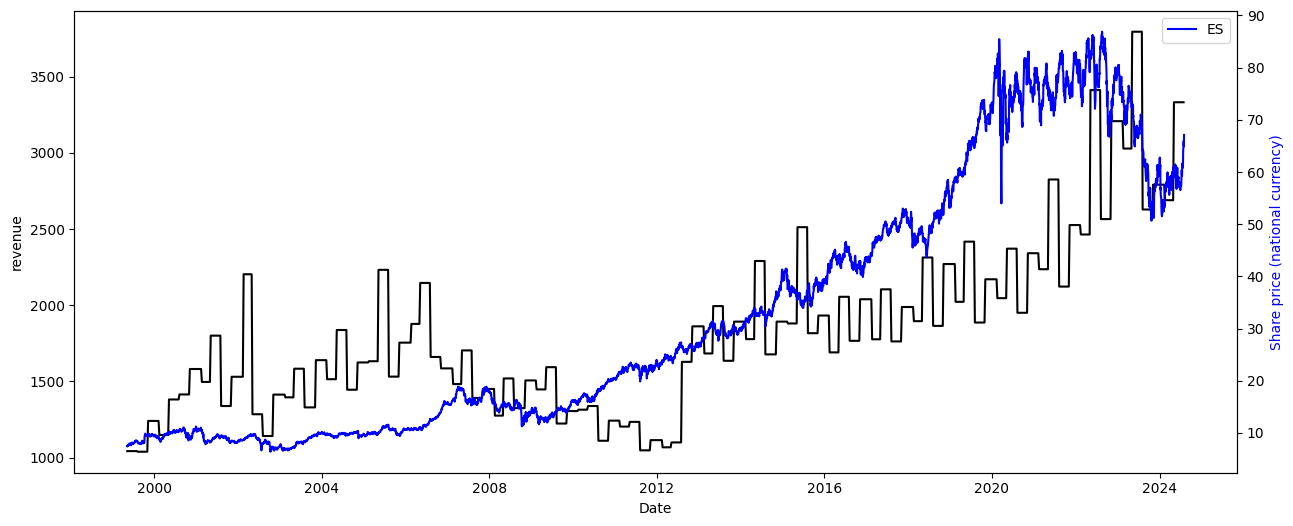

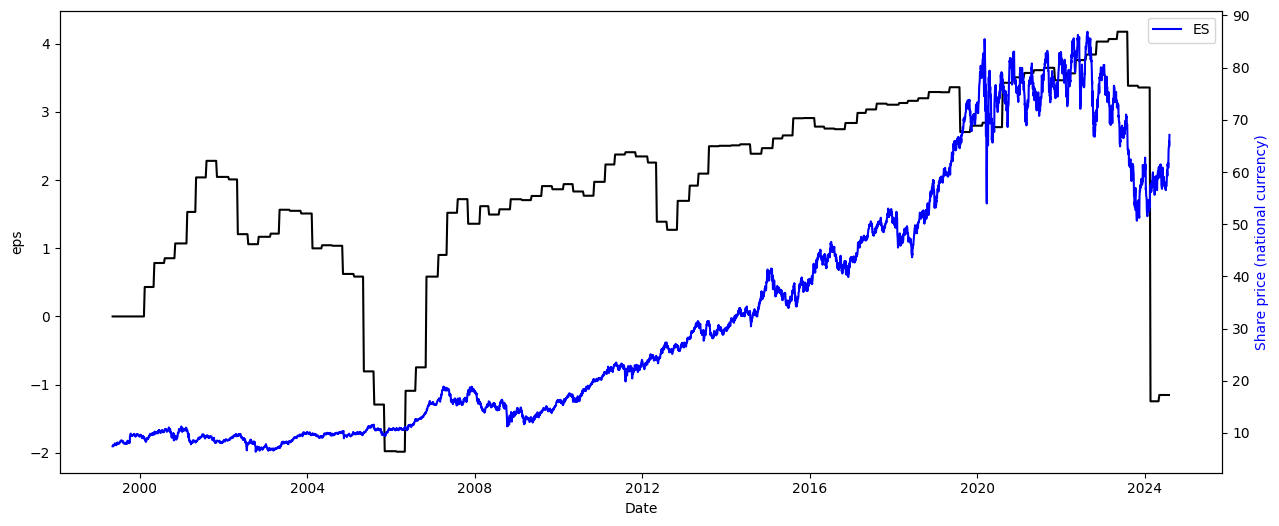

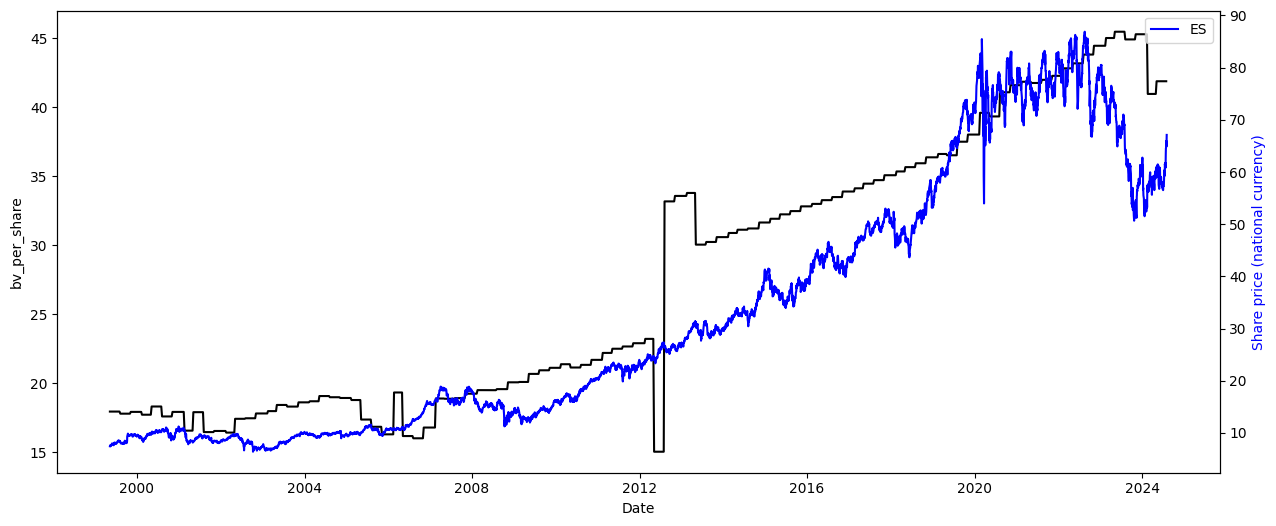

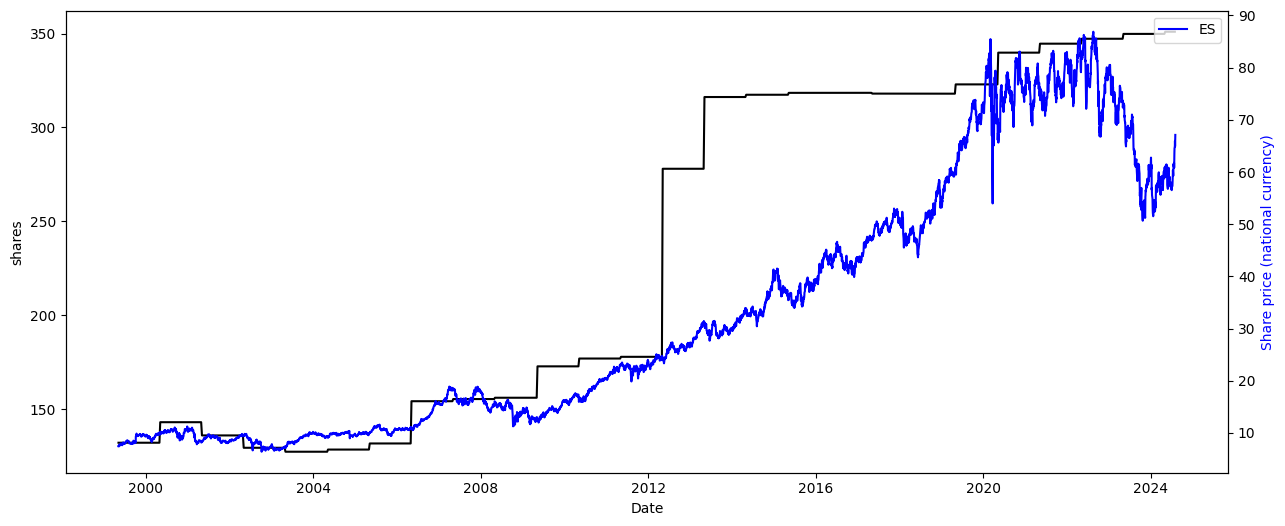

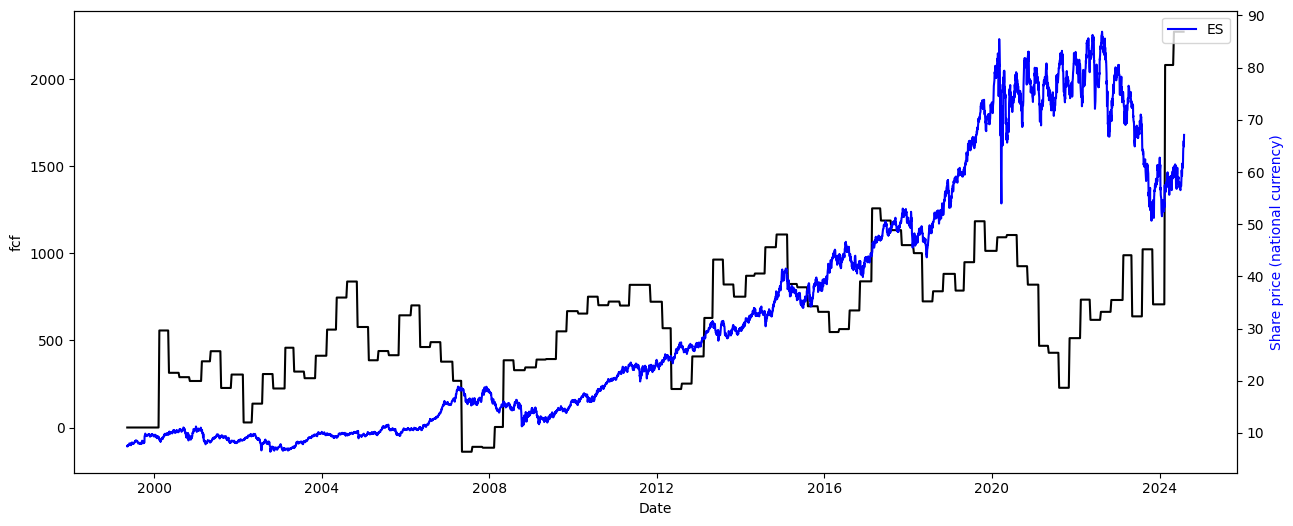

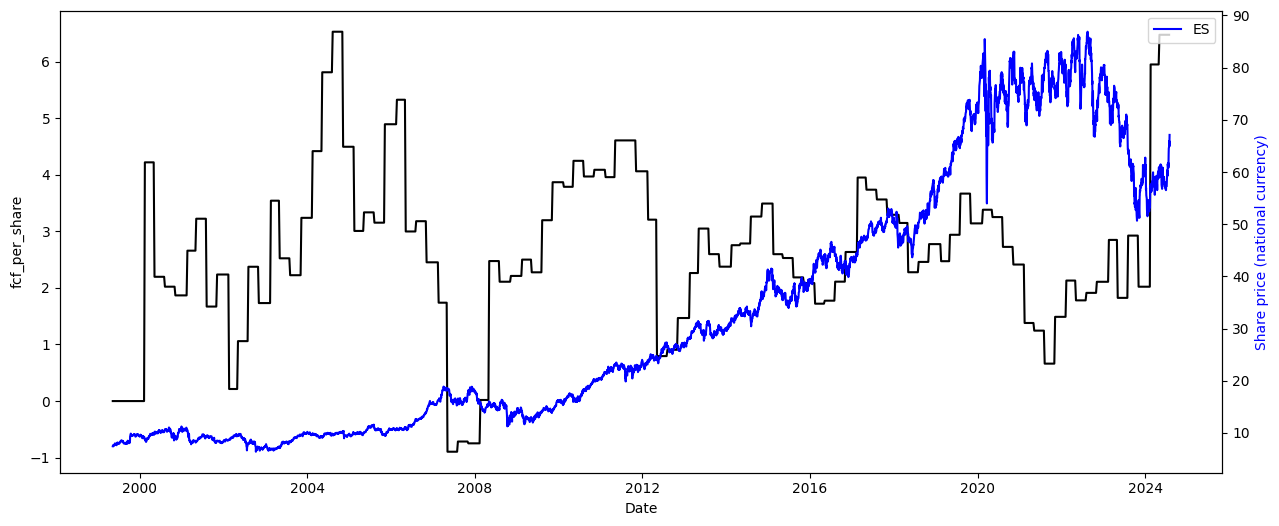

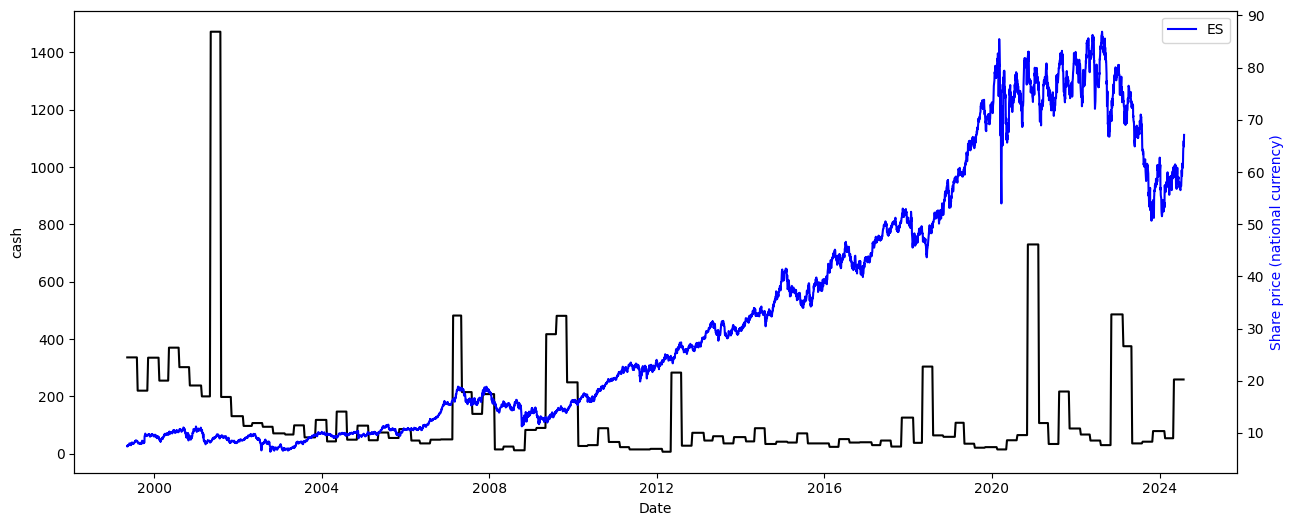

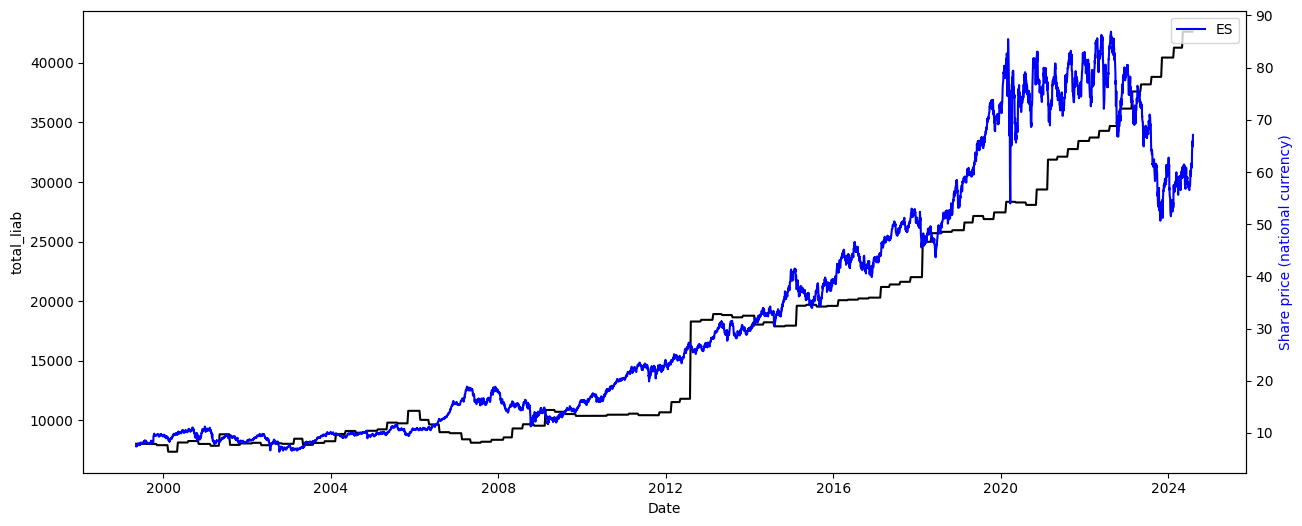

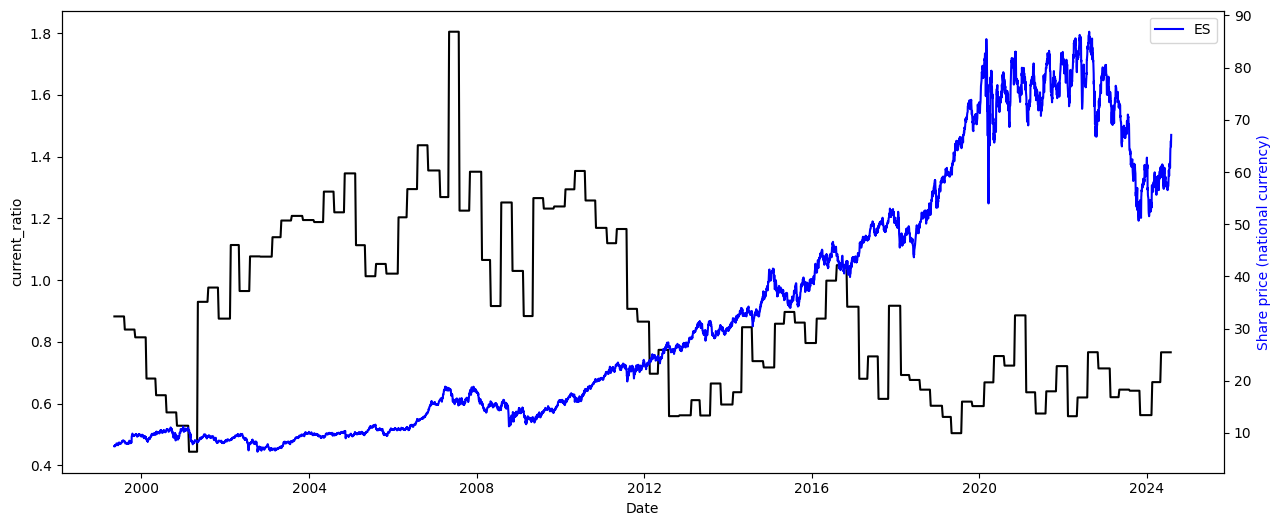

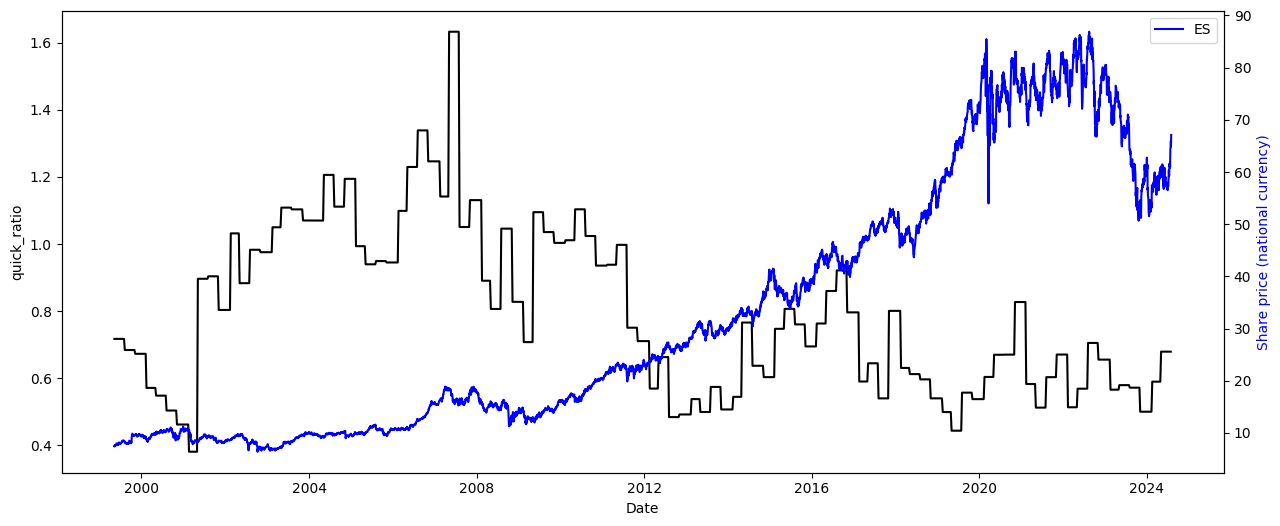

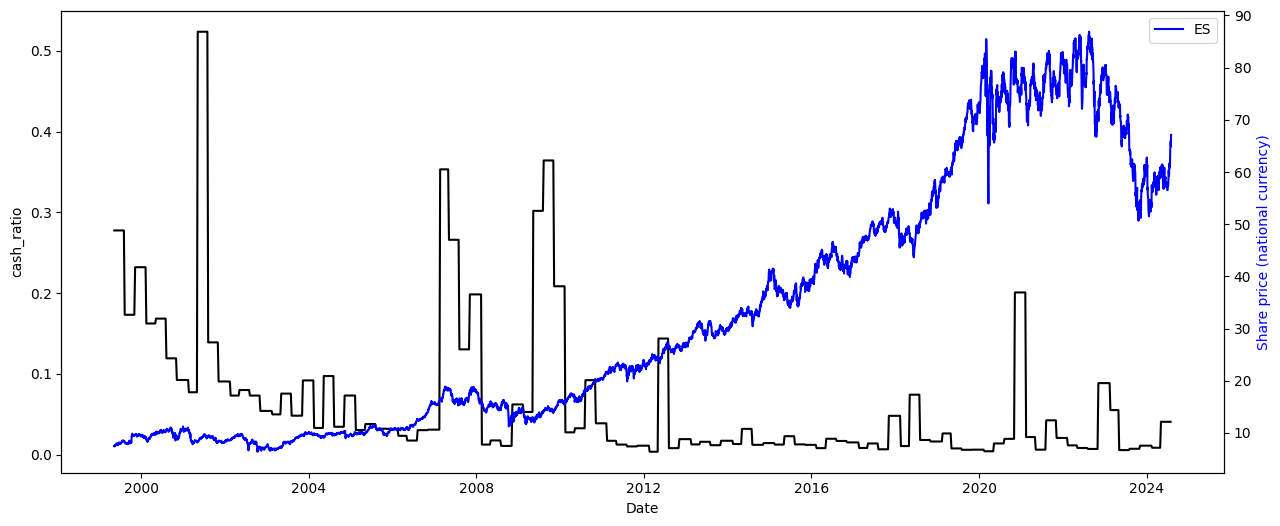

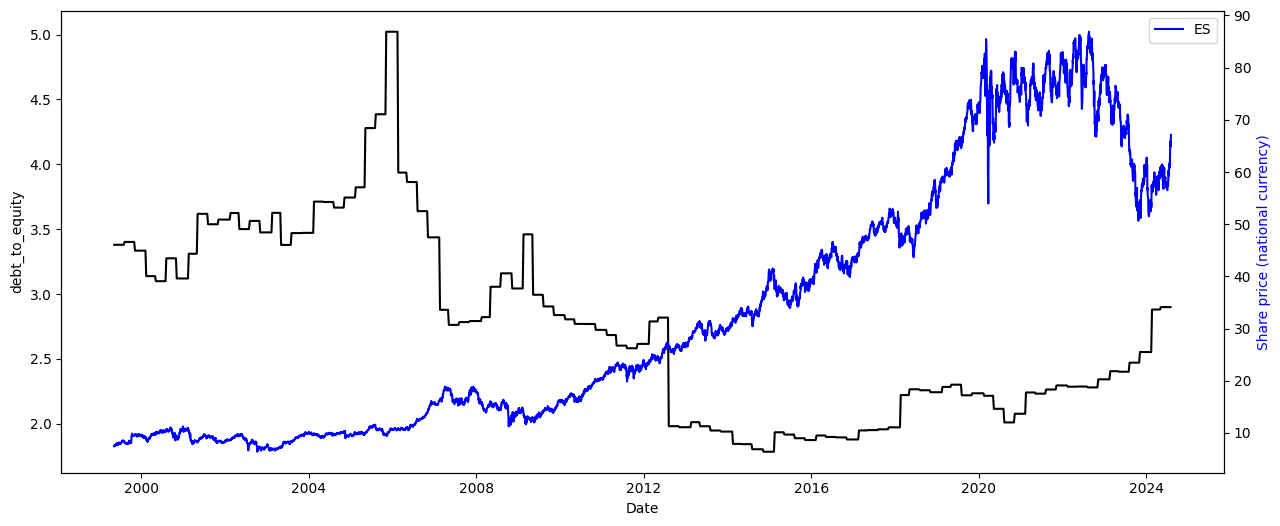

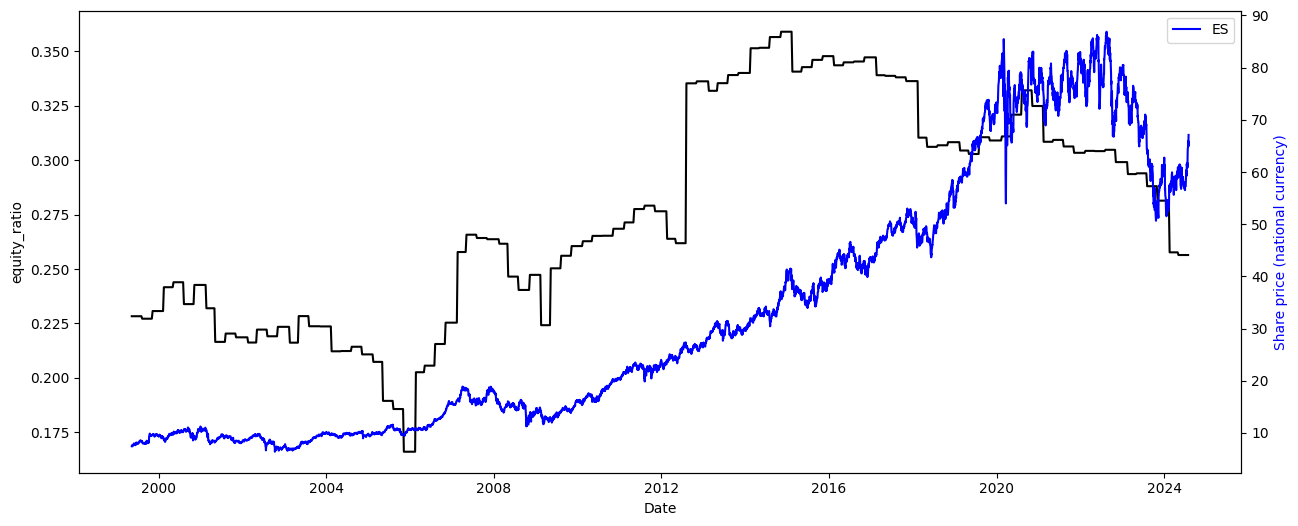

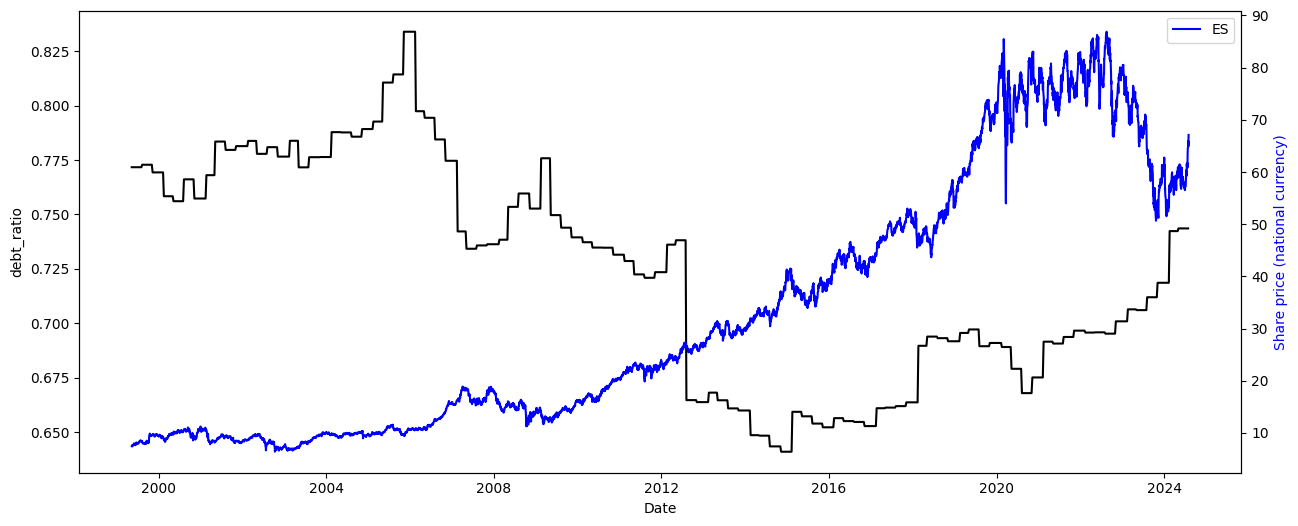

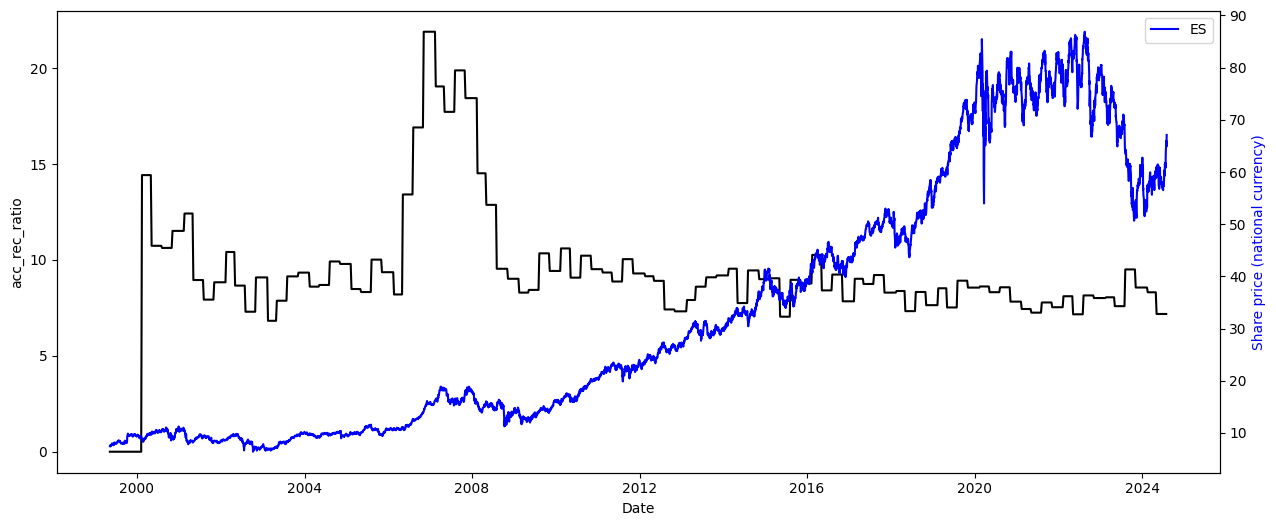

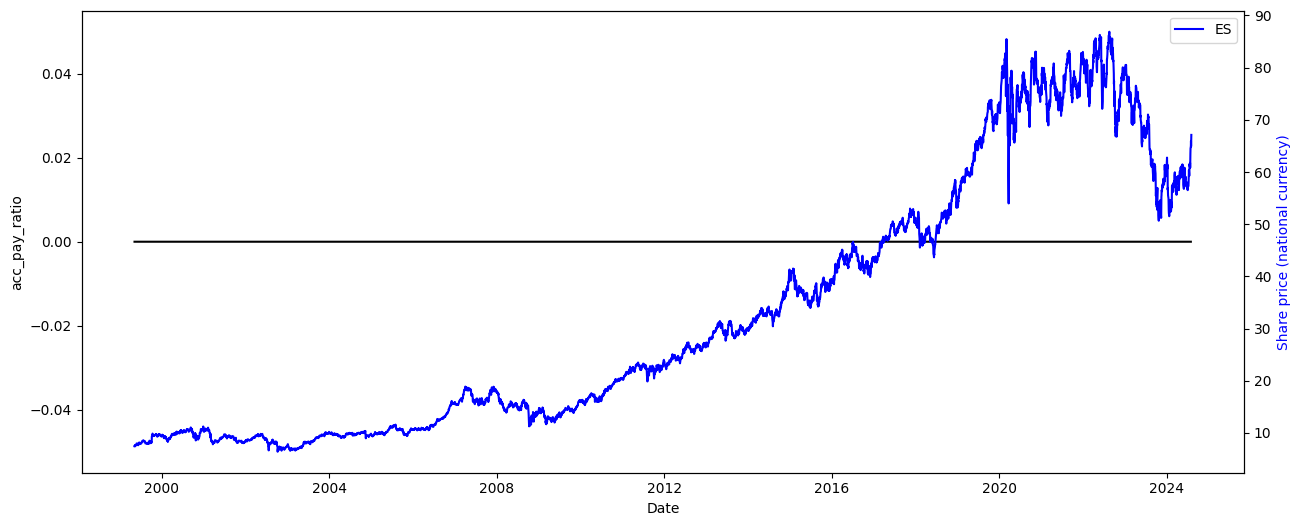

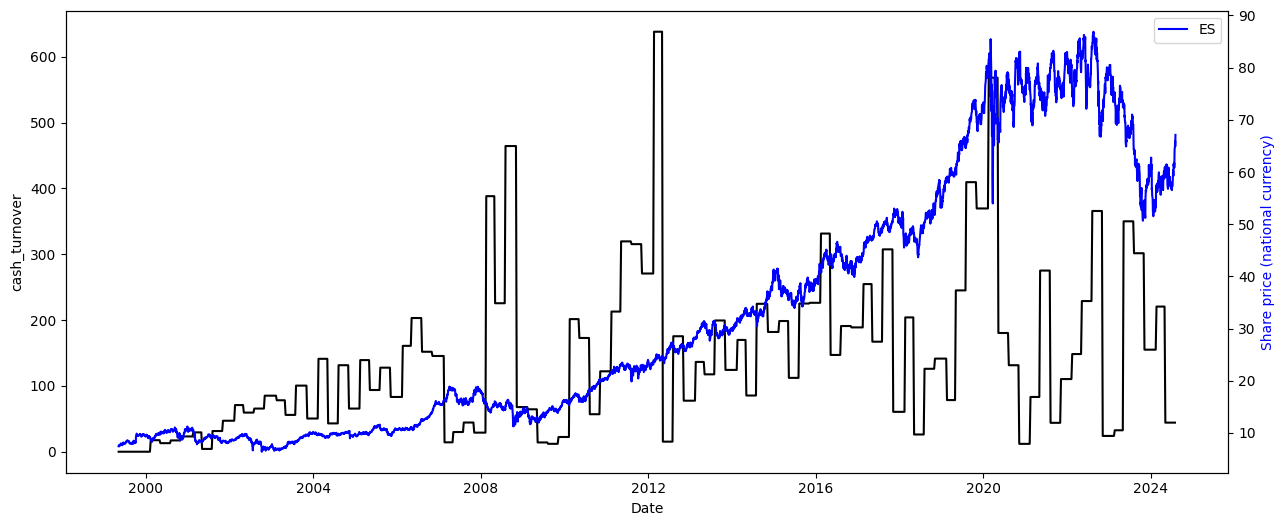

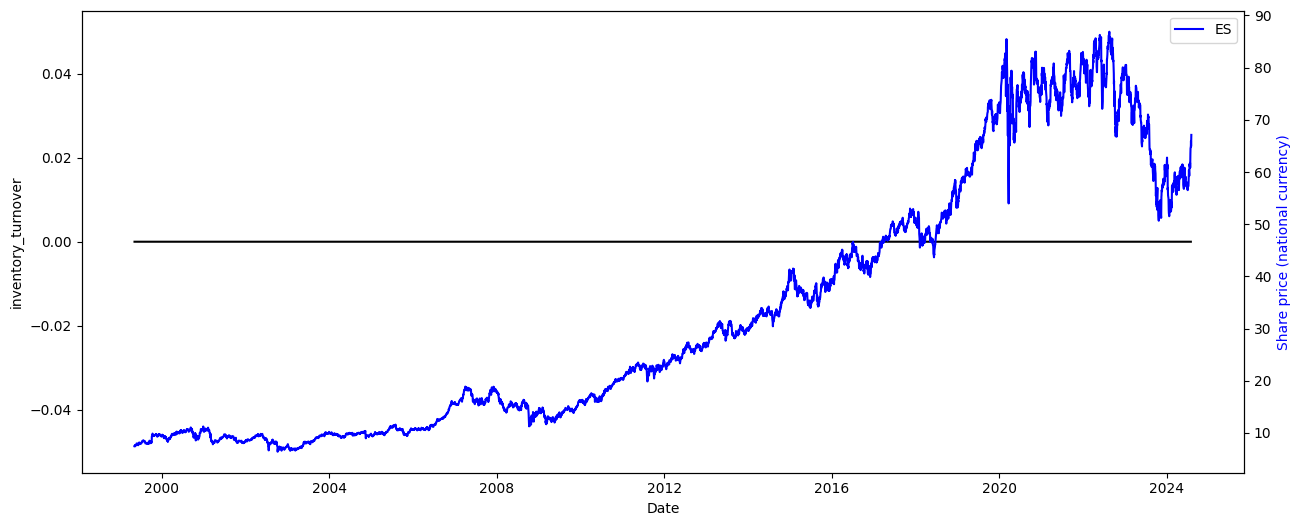

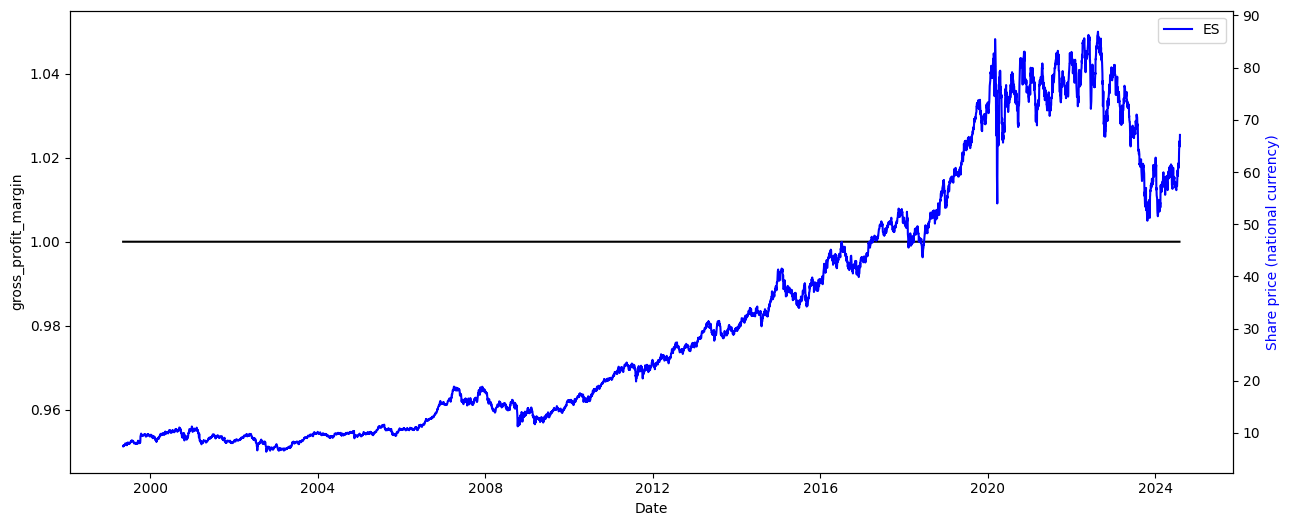

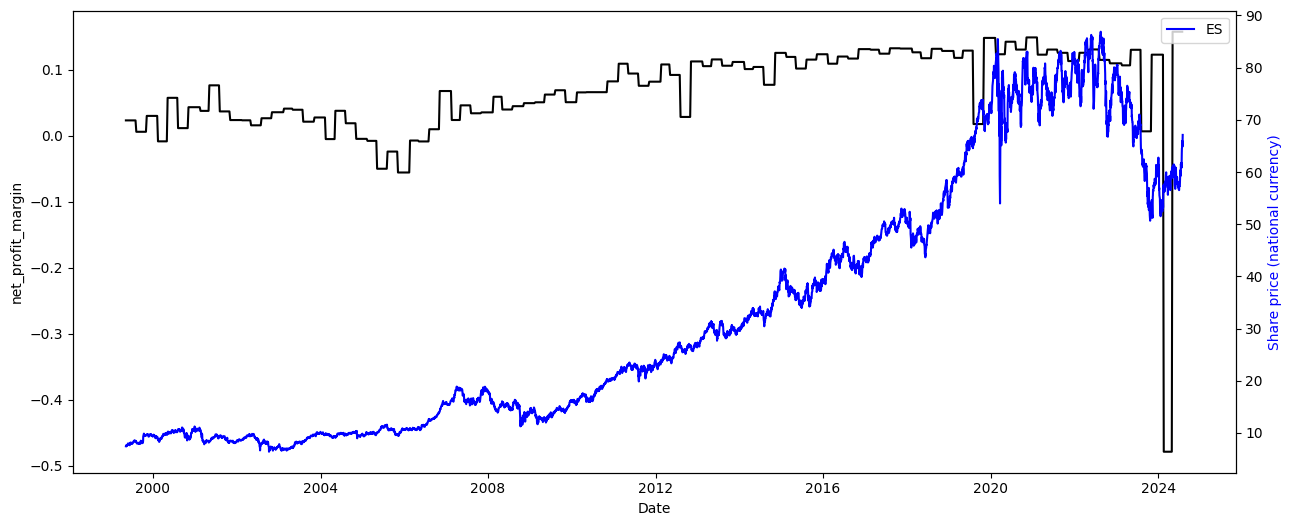

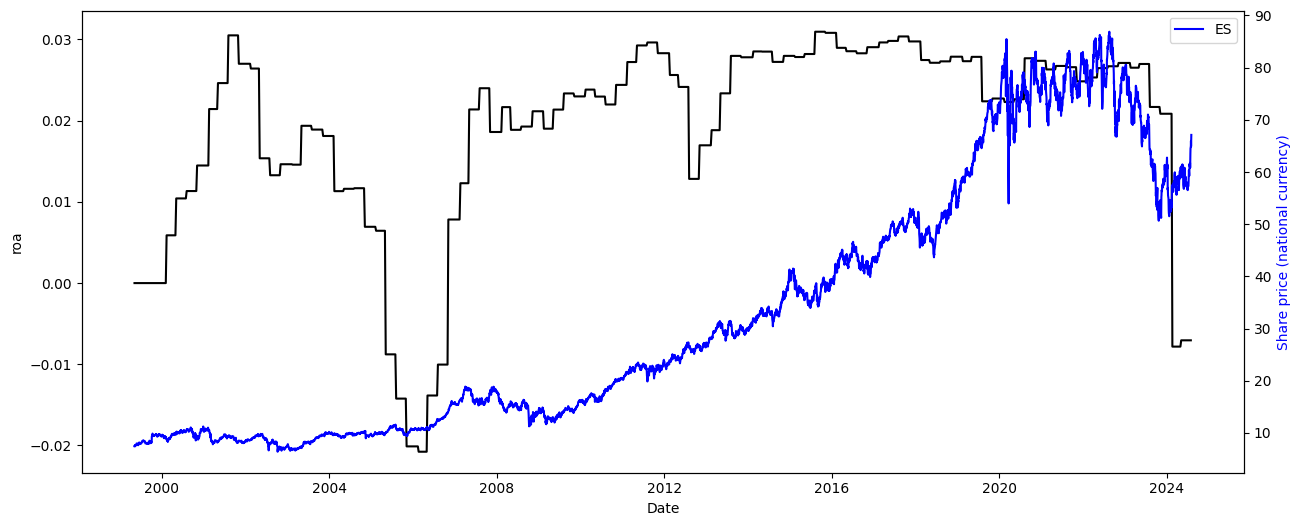

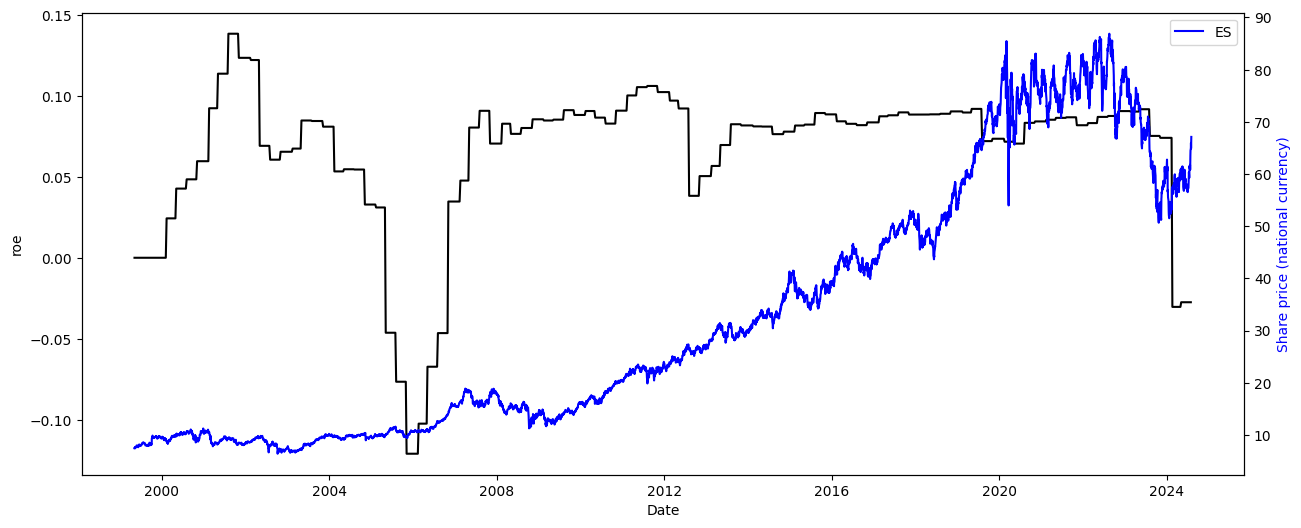

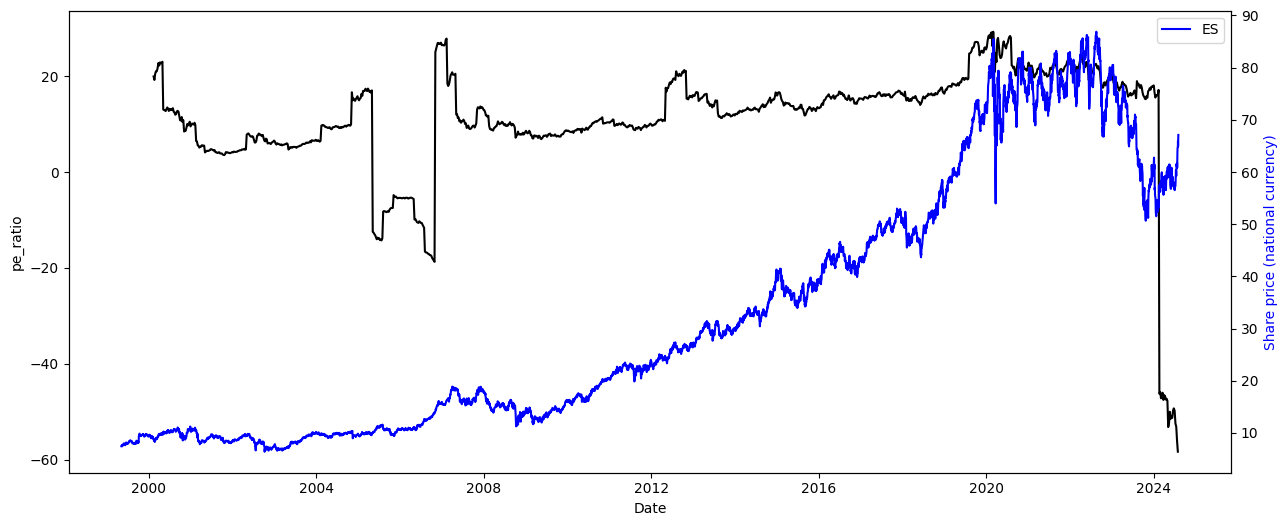

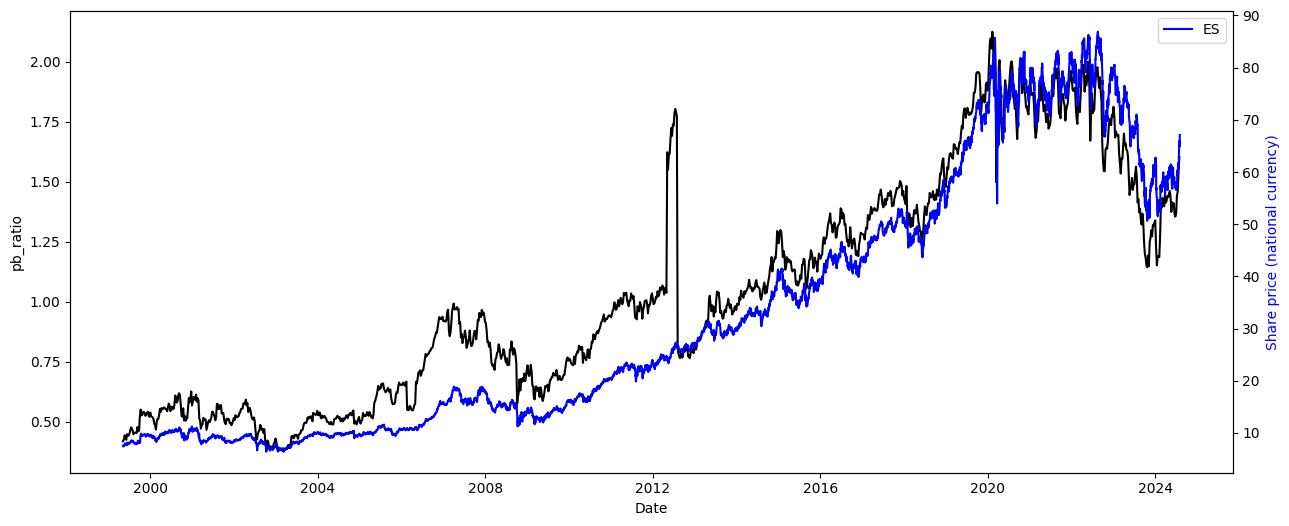

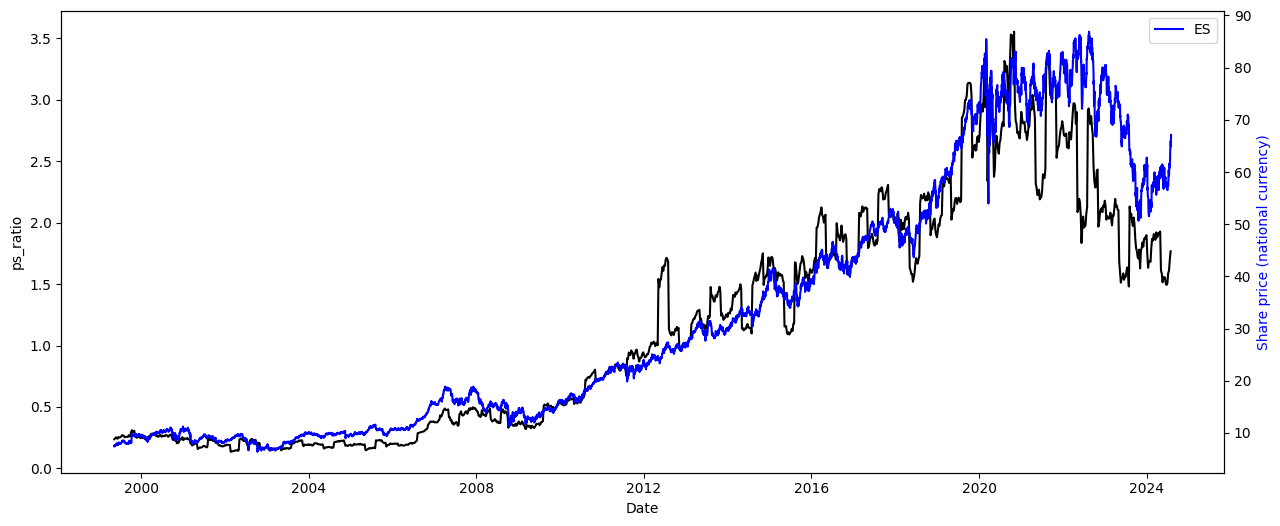

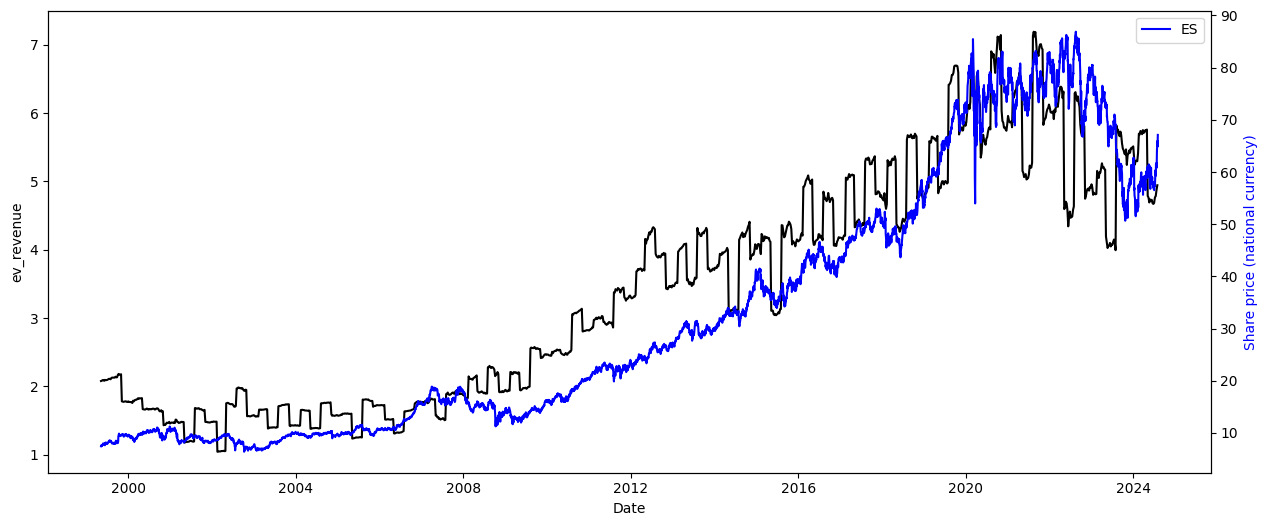

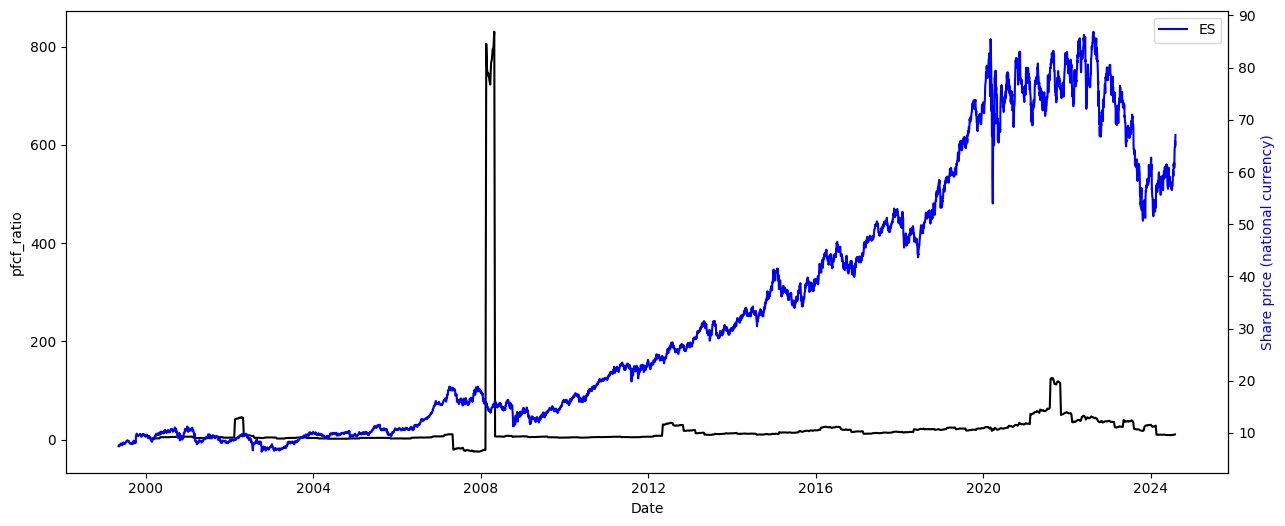

In [18]:
for column in merged_nat_curr.columns[3:]:
    fig, ax1 = plt.subplots(figsize=(15, 6))

    ax2 = ax1.twinx()
    ax1.plot(merged_nat_curr['real_date'], merged_nat_curr[column], color='k', label=merged_nat_curr)
    ax2.plot(ticker_all_price.index, ticker_all_price['Close'], color='b', label=share_name)

    ax1.set_xlabel('Date')
    ax1.set_ylabel(column, color='k')
    ax2.set_ylabel('Share price (national currency)', color='b')

    plt.legend()
    plt.show()

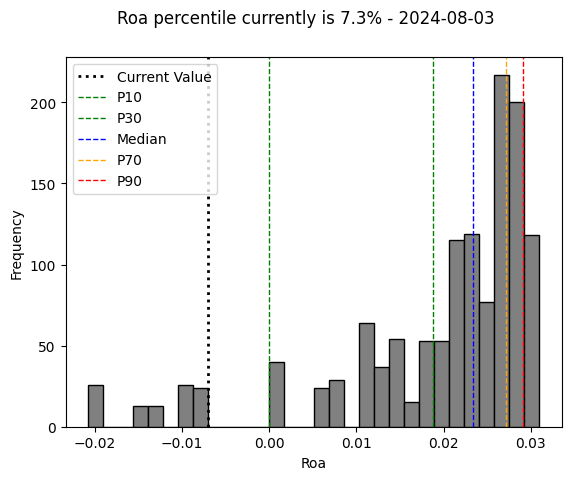

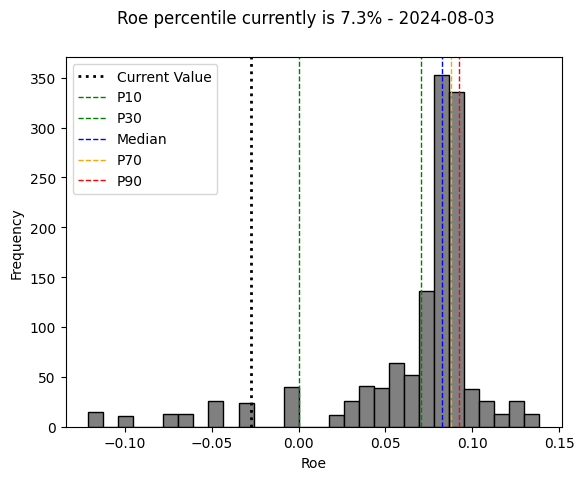

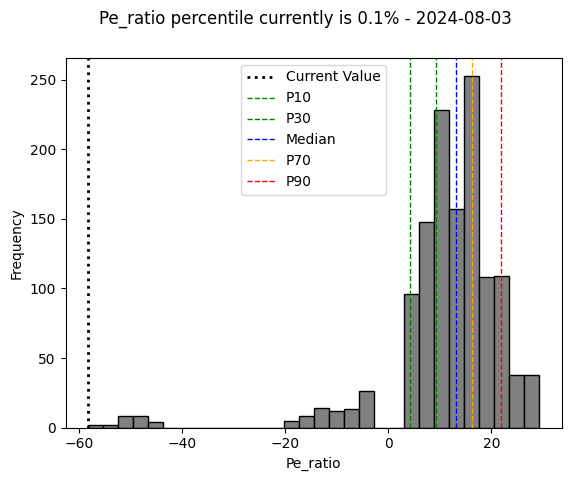

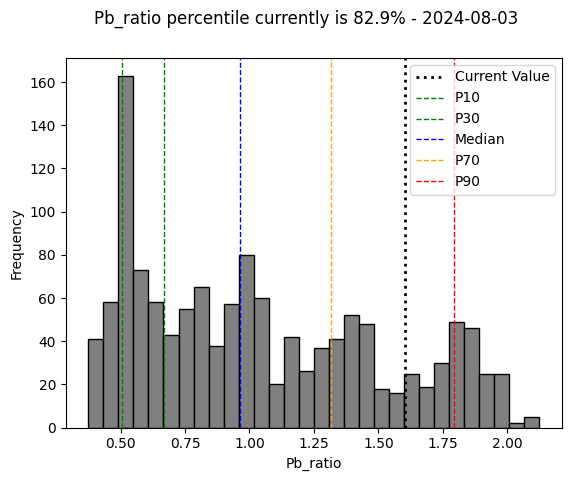

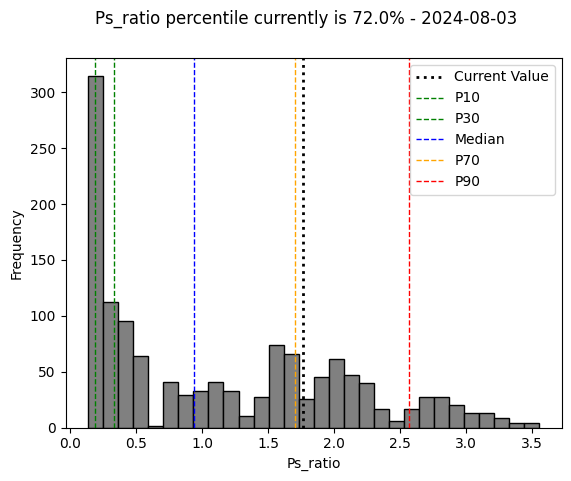

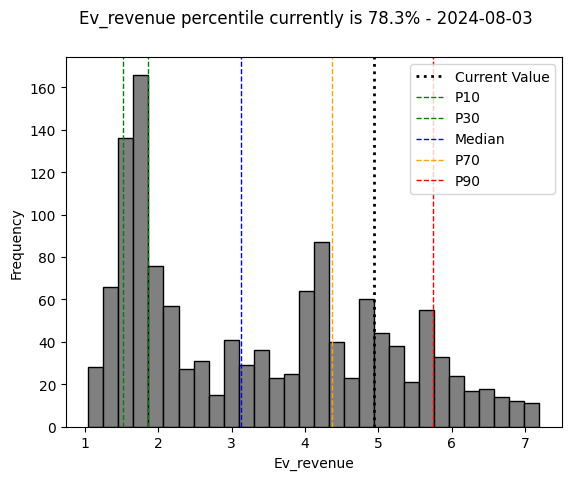

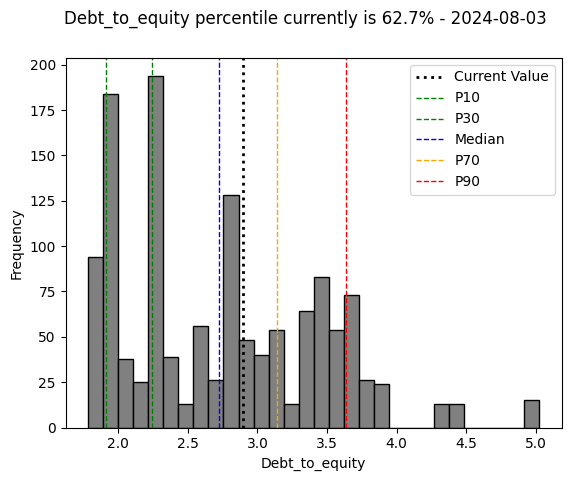

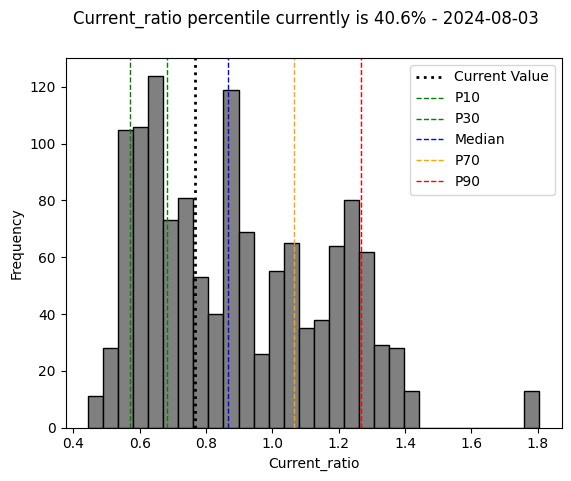

In [19]:
# plot histograms of value parameters
utils.plot_histogram_value_parameters(input_df=merged_nat_curr, extra_parameters=[], owned_shares=owned_shares)

## Calculate correlation between value parameters

In [20]:
# calulate value parameters Pearson's correlation coefficient
pd.DataFrame(merged_nat_curr, columns=['roa', 'roe', 'pe_ratio', 'pb_ratio', 'ps_ratio', 'ev_revenue', 'debt_to_equity', 'current_ratio']).corr()

,roa,roe,pe_ratio,pb_ratio,ps_ratio,ev_revenue,debt_to_equity,current_ratio
roa,1.000000,0.951706,0.626255,0.456064,0.491836,0.472027,-0.739594,-0.288770
roe,0.951706,1.000000,0.553024,0.277659,0.300223,0.284139,-0.551758,-0.168544
pe_ratio,0.626255,0.553024,1.000000,0.399762,0.432880,0.377905,-0.496547,-0.276439
pb_ratio,0.456064,0.277659,0.399762,1.000000,0.959494,0.927754,-0.697564,-0.524163
ps_ratio,0.491836,0.300223,0.432880,0.959494,1.000000,0.983978,-0.757005,-0.606479
ev_revenue,0.472027,0.284139,0.377905,0.927754,0.983978,1.000000,-0.760537,-0.633194
debt_to_equity,-0.739594,-0.551758,-0.496547,-0.697564,-0.757005,-0.760537,1.000000,0.515990
current_ratio,-0.288770,-0.168544,-0.276439,-0.524163,-0.606479,-0.633194,0.515990,1.000000


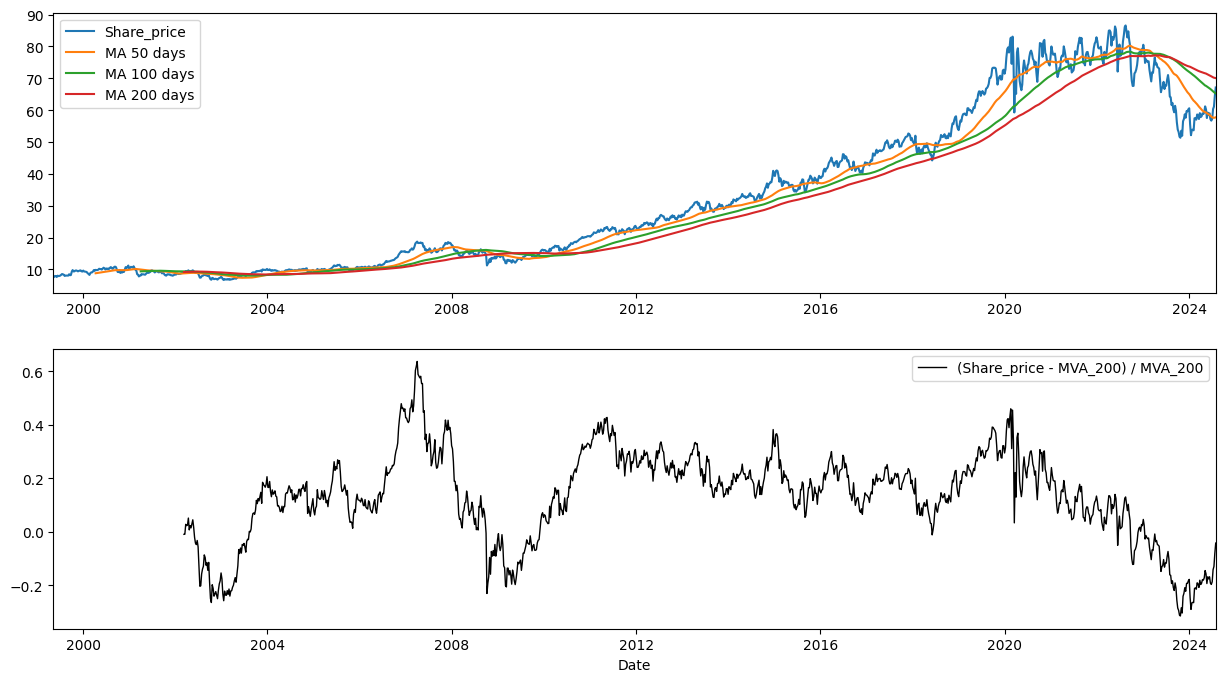

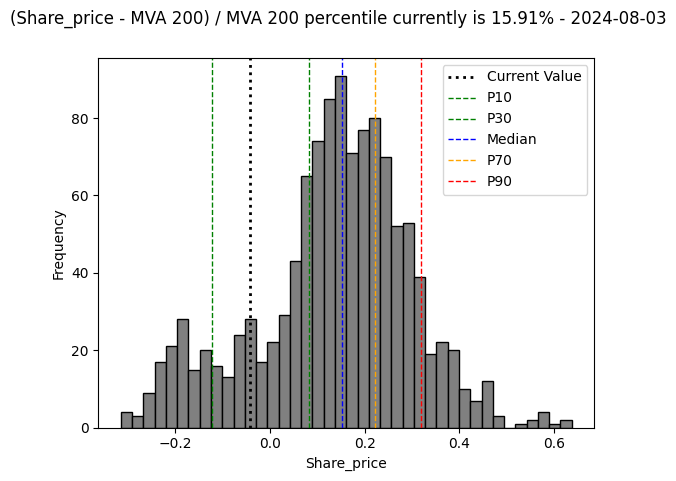

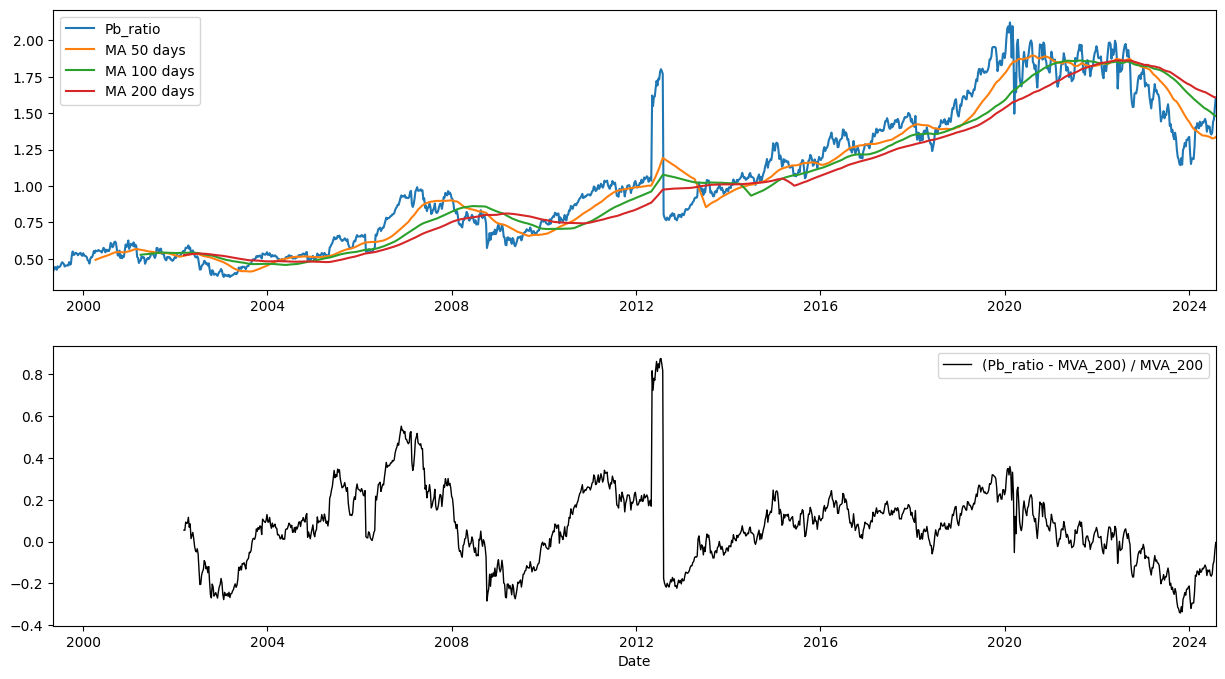

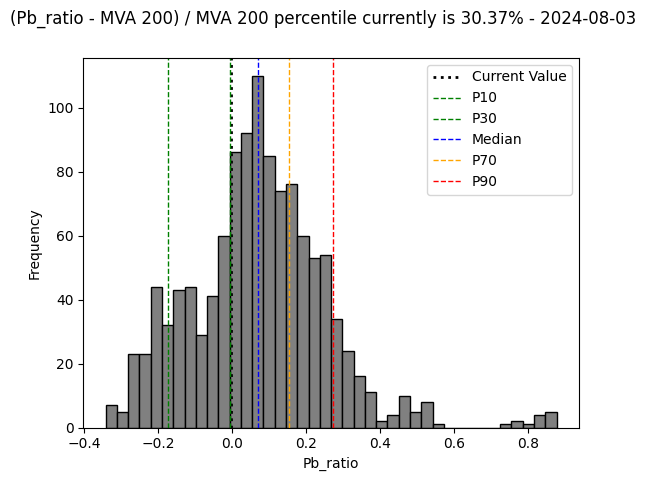

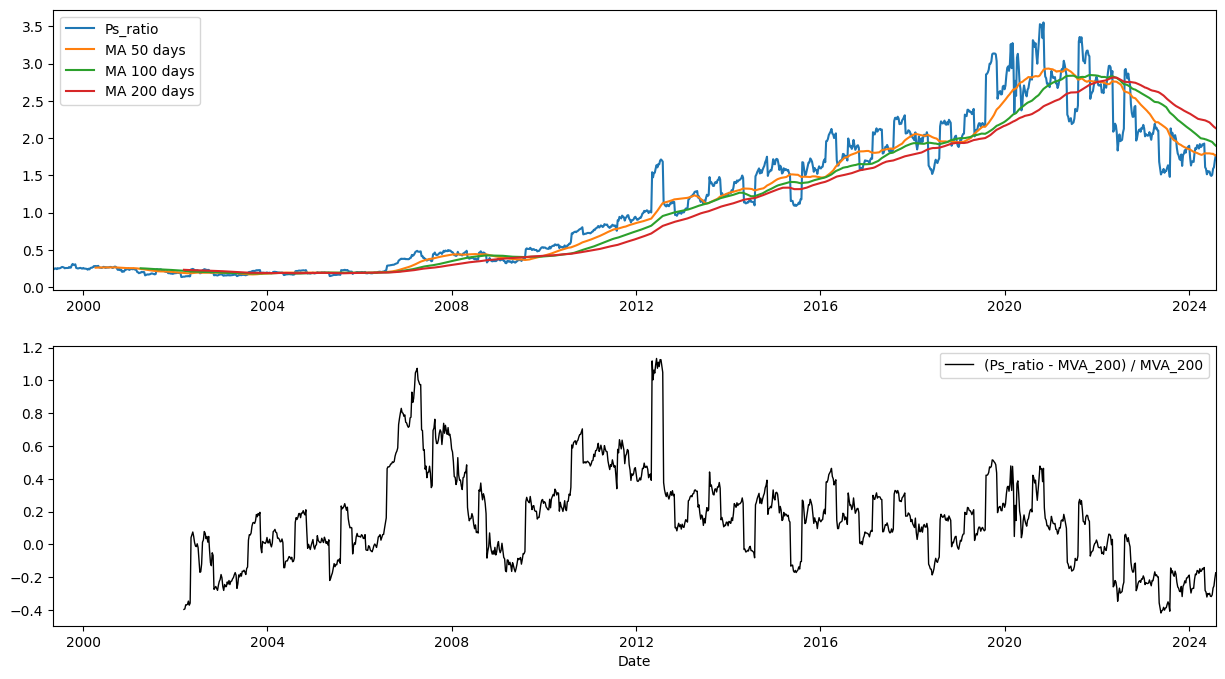

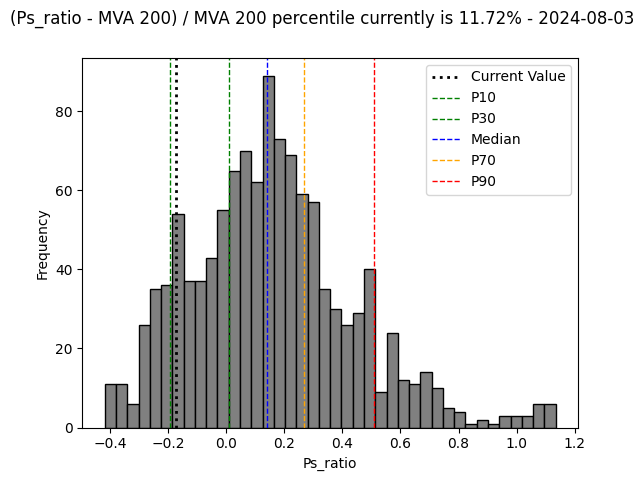

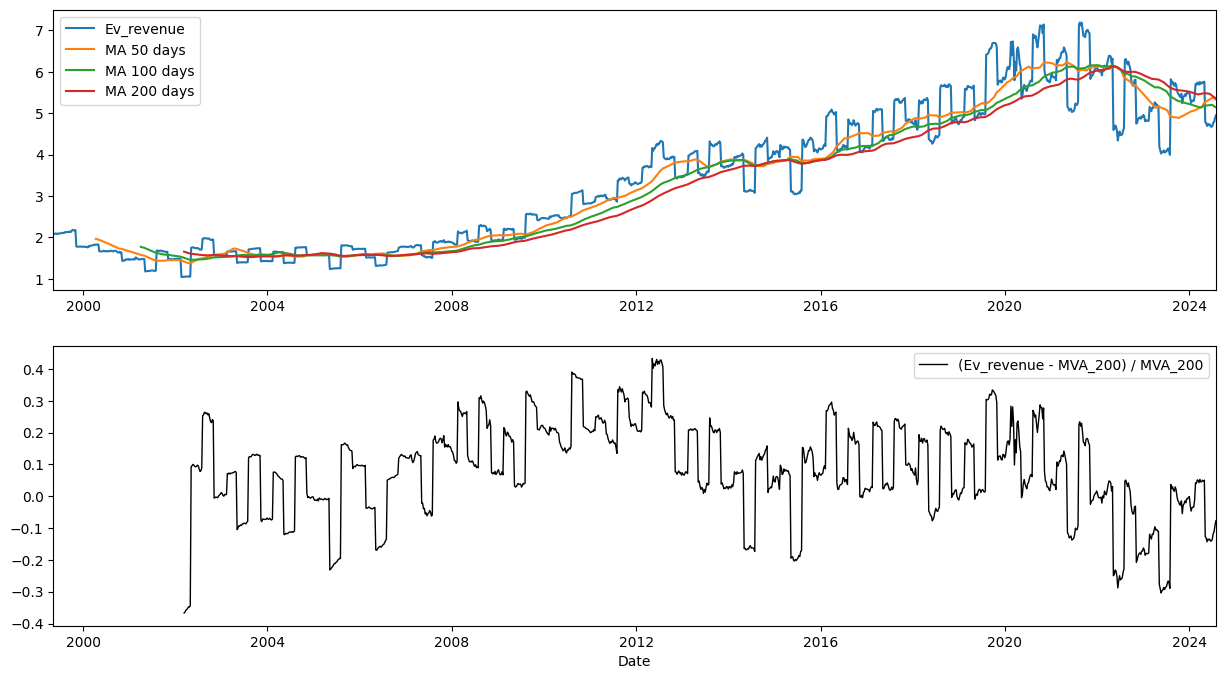

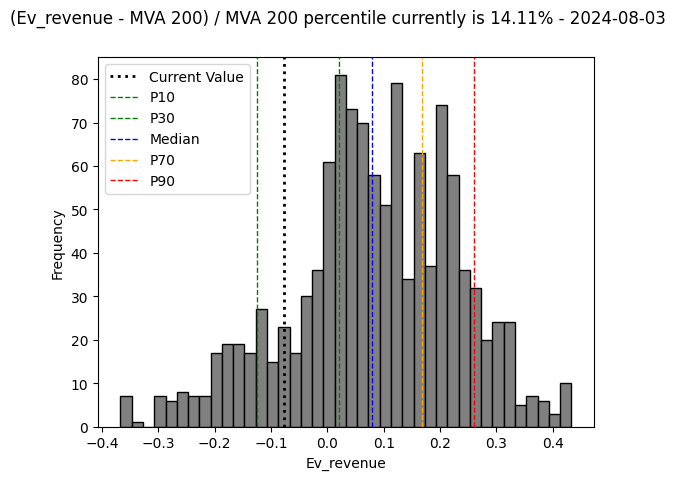

In [21]:
final_df = utils.utility_evaluation(
    input_df=merged_nat_curr,
    owned_shares=owned_shares
    )